<a href="https://colab.research.google.com/github/dphi-official/Data_Science_Bootcamp/blob/master/Advanced_Material/EDA_Personal_Email_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Let's load the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Python library for reading IMAP mailboxes and converting the email content to human readable data
!pip install mailbox

In [ ]:
#When you have loaded the libraries, load the dataset:

import mailbox
mboxfile = "data.mbox"

mbox = mailbox.mbox(mboxfile)

In [ ]:
#let's see the list of available keys in mbox
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
From
Message-ID
Subject
MIME-Version
Content-Type
To
Date
X-LinkedIn-Class
X-LinkedIn-Template
X-LinkedIn-fbl
X-LinkedIn-Id
Feedback-ID
Require-Recipient-Valid-Since


In [ ]:
import csv
#create a CSV file with only the required attributes:
# Go to https://www.programiz.com/python-programming/writing-csv-files to understand the working of csv writer
with open('mailbox.csv', 'w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    for message in mbox:
        writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [ ]:
# Reading the csv file that we created
dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [ ]:
#Check the datatypes
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [ ]:
#Note that a date field is an object. 
#So, we need to convert it into a DateTime argument( It displays date in a better format)
#we are going to convert the date field into an actual DateTime argument. We can do this by using the pandas to_datetime() method. 
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

/Users/joinalahmed/opt/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/joinalahmed/opt/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/joinalahmed/opt/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/joinalahm

In [ ]:
#remove NaN values from the field
dfs = dfs[dfs['date'].notna()]

In [ ]:
#saving the modified csv
dfs.to_csv('gmail.csv')


# Applying descriptive statistics


In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17283 entries, 1 to 17477
Data columns (total 6 columns):
subject    17071 non-null object
from       17283 non-null object
date       17283 non-null datetime64[ns, UTC]
to         17163 non-null object
label      17281 non-null object
thread     17283 non-null object
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 945.2+ KB


In [ ]:
dfs.head(10)

,subject,from,date,to,label,thread
1,Joinal: 1 new job for 'data scientist' in Jaka...,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,2020-05-26 20:48:55+00:00,Joinal Ahmed <joinalahmed@gmail.com>,"Bin,Category Updates,Unread",1667787536921813032
2,=?utf-8?B?W0ZyZWUgVmlydHVhbCBFdmVudF0gTW9uZ29E...,"""MongoDB.live 2020"" <mongodbteam@mongodb.com>",2020-05-27 04:36:07+00:00,joinalahmed@gmail.com,"Important,Bin,Opened,Category Promotions",1667816930628387143
3,Avail your Free SAS eLearning Subscription today,SAS India <newsletters@analyticsindiamag.com>,2020-05-27 06:19:38+00:00,joinalahmed@gmail.com,"Bin,Category Promotions,Unread",1667823857620680141
4,"=?utf-8?Q?Joy,_spend_on_experiences_not_things...",Netflix <info@mailer.netflix.com>,2020-05-27 03:54:03+00:00,joinalahmed@gmail.com,"Bin,Category Promotions,Unread",1667814281105483691
5,New videos from Last moment tuitions,YouTube <noreply@youtube.com>,2020-05-27 01:30:54+00:00,JOINAL AHMED <joinalahmed@gmail.com>,"Bin,Opened,Category Social",1667805274027596988
6,"Joinal, please add me to your LinkedIn network",RANJITH RAJENDRAN R <invitations@linkedin.com>,2020-05-27 06:31:42+00:00,Joinal Ahmed <joinalahmed@gmail.com>,"Bin,Category Social,Unread",1667732630073345432
7,"Joinal, please add me to your LinkedIn network",Venkat Nagaram <invitations@linkedin.com>,2020-05-26 19:54:12+00:00,Joinal Ahmed <joinalahmed@gmail.com>,"Bin,Category Social,Unread",1667732630073345432
8,"Joinal, please add me to your LinkedIn network",Mayur Dhameliya <invitations@linkedin.com>,2020-05-26 09:11:23+00:00,Joinal Ahmed <joinalahmed@gmail.com>,"Bin,Category Social,Unread",1667732630073345432
9,"Joinal, please add me to your LinkedIn network",Rupakanth Gundralla <invitations@linkedin.com>,2020-05-26 06:16:14+00:00,Joinal Ahmed <joinalahmed@gmail.com>,"Bin,Category Social,Unread",1667732630073345432
10,"Edureka Masterclass list: ""Reminder! Webinar O...","""Edureka! (Meetup)"" <meetup-group-DPfwLAVR-ann...",2020-05-26 12:58:42+00:00,meetup-group-DPfwLAVR-announce@meetup.com,"Bin,Category Forums,Unread",1667757950949060307


In [ ]:
dfs.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [ ]:
import re
# function that takes an entire string from any column and extracts an email address
def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string) #regular expression to find an email address
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan #if email is found, return that email. Else return nan

In [ ]:
#Applying the extract_email_ID function to each element of the 'from' column and saving it back
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [ ]:
#we are going to refactor(restructure) the label field. The logic is simple. 
#If an email is from your email address, then it is the sent email. Otherwise, it is a received email, that is, an inbox email:
myemail = 'joinalahmed@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [ ]:
# The 'to' column is useless, we can drop it
dfs.drop(columns='to', inplace=True)

In [ ]:
dfs.head(10)

,subject,from,date,label,thread
1,Joinal: 1 new job for 'data scientist' in Jaka...,jobalerts-noreply@linkedin.com,2020-05-26 20:48:55+00:00,inbox,1667787536921813032
2,=?utf-8?B?W0ZyZWUgVmlydHVhbCBFdmVudF0gTW9uZ29E...,mongodbteam@mongodb.com,2020-05-27 04:36:07+00:00,inbox,1667816930628387143
3,Avail your Free SAS eLearning Subscription today,newsletters@analyticsindiamag.com,2020-05-27 06:19:38+00:00,inbox,1667823857620680141
4,"=?utf-8?Q?Joy,_spend_on_experiences_not_things...",info@mailer.netflix.com,2020-05-27 03:54:03+00:00,inbox,1667814281105483691
5,New videos from Last moment tuitions,noreply@youtube.com,2020-05-27 01:30:54+00:00,inbox,1667805274027596988
6,"Joinal, please add me to your LinkedIn network",invitations@linkedin.com,2020-05-27 06:31:42+00:00,inbox,1667732630073345432
7,"Joinal, please add me to your LinkedIn network",invitations@linkedin.com,2020-05-26 19:54:12+00:00,inbox,1667732630073345432
8,"Joinal, please add me to your LinkedIn network",invitations@linkedin.com,2020-05-26 09:11:23+00:00,inbox,1667732630073345432
9,"Joinal, please add me to your LinkedIn network",invitations@linkedin.com,2020-05-26 06:16:14+00:00,inbox,1667732630073345432
10,"Edureka Masterclass list: ""Reminder! Webinar O...",meetup-group-DPfwLAVR-announce@meetup.com,2020-05-26 12:58:42+00:00,inbox,1667757950949060307


In [ ]:
import datetime 
import pytz
#refactor timezones
def refactor_timezone(x):
  est = pytz.timezone('US/Eastern')
  return x.astimezone(est)

In [ ]:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [ ]:
#convert the day of the week variable into the name of the day, as in, Saturday, Sunday, and so on.
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.weekday_name)
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [ ]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [ ]:
# refactor the hour, the year integer, and the year fraction, respectively. 
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [ ]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [ ]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [ ]:
dfs.index = dfs['date']
del dfs['date']

In [ ]:
#"How many emails did I send during a given timeframe?"
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Sun, 23 Sep 2012 06:13 AM
Wed, 27 May 2020 03:52 AM
inbox    15142
sent      2141
Name: label, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# ticker module contains classes to support completely configurable tick locating and formatting.
# MaxNLocator finds up to a max number of intervals with ticks at nice locations.

In [ ]:
# This function might look complex and hard to understand
# All it does is set how the plots will look
# It first plots a scatter plot
# It then adds the location of the ticks on x and y axis, labels and title
# The scatter plot will only be drawn when the function is called

def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('US/Eastern')
    
  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [ ]:
#Let's create two sub-dataframe—one for sent emails and another for received emails:

sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

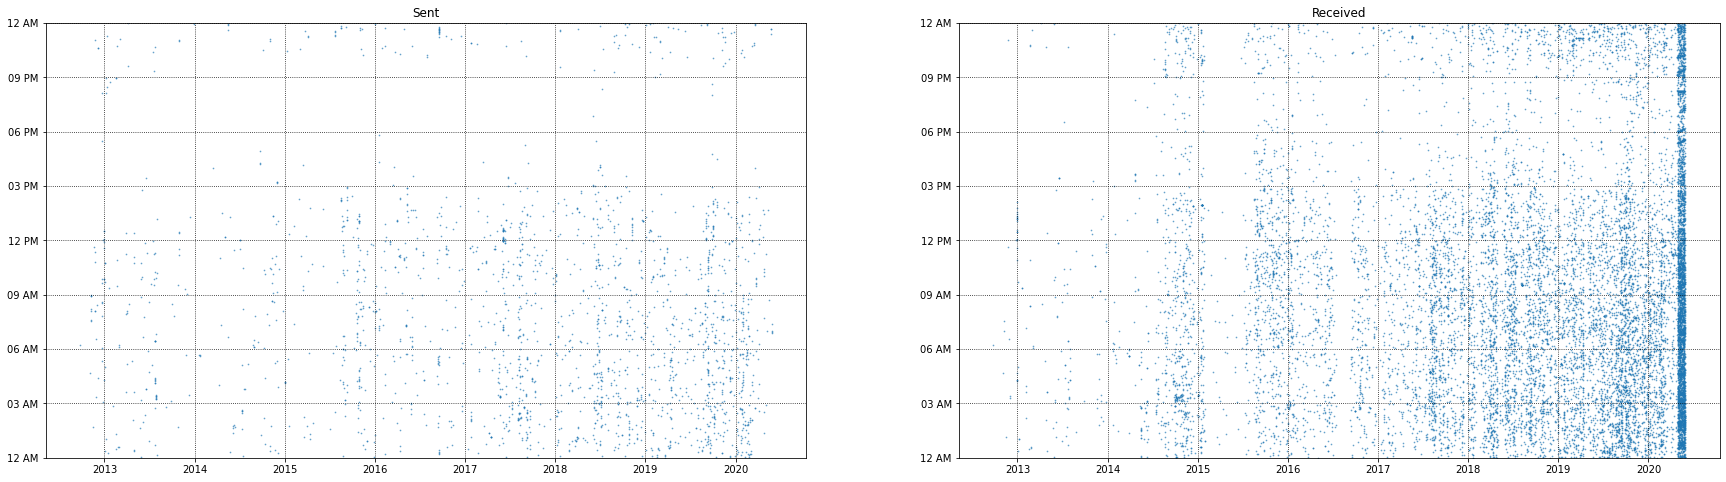

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))

# Since the function is called twice, one with sent and other with recieved as datapoints, 2 plots will be made

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

The higher the density of the graph data points, the higher the number of emails. Note that the number of sent emails is less than the number of received emails. I received more emails than I sent from 2012 to 2020. Note that I received most of the emails between 03:00 PM and 03:00 AM. This graph gives a nice overview of the time of day of email activity. 

In [ ]:
# Function to plot a histogram for average emails per day
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [ ]:
from scipy import ndimage

# Function to plot a histogram for average emails per hour
def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);



In [ ]:
# This class specifies the location of each plot
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])  
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

/Users/joinalahmed/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/joinalahmed/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()


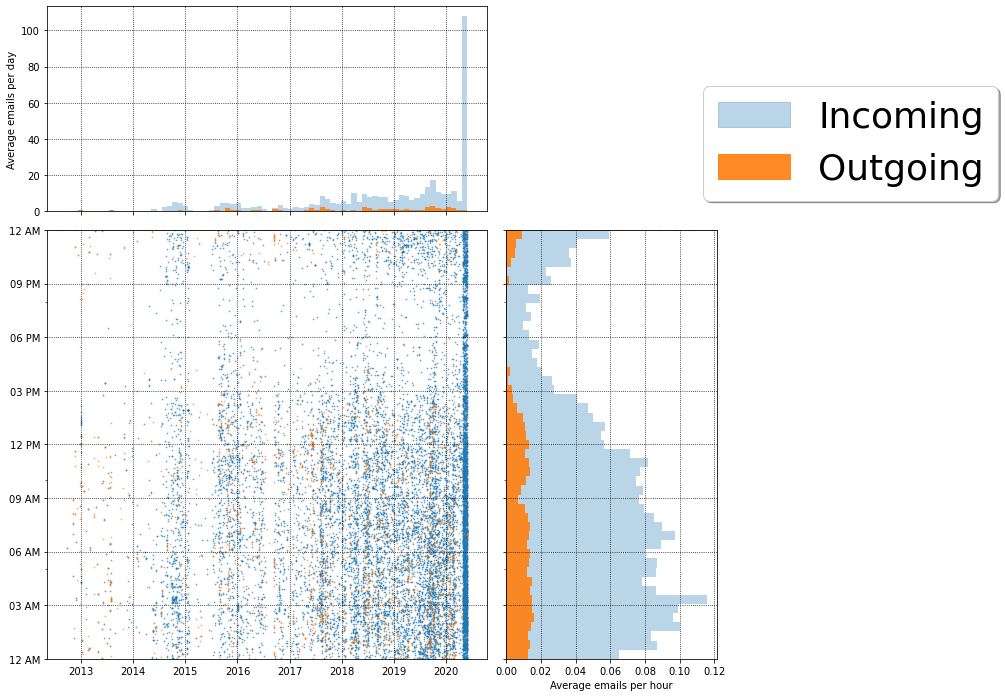

In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
# Specifying the figure size and calling the function to plot the graphs
plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.3)
tpl.plot(sent, color='C1', alpha=0.9)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.3)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.9)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=36, shadow=True);

The average emails per hour and per graph is illustrated by the preceding graph. In my case, most email communication happened between 2018 and 2020. 

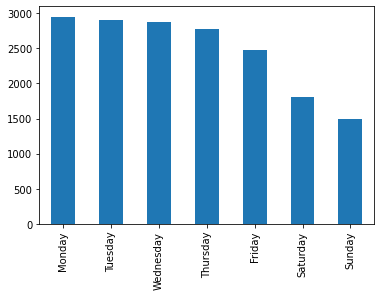

In [ ]:
# Counting the no. of emails received each day of the week and plotting a bar chart
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

The preceding output shows that my busiest day is Monday. I receive most of my emails on monday,tuesday. Lets go one step further and see the most active days for receiving and sending emails separately:

In [ ]:
# Finding out who sends me the most emails

addrs = received['from'].value_counts()

addrs[0:10]

joinalahmed@gmail.com         2141
info@meetup.com                543
info@hirist.com                164
newsletters@shopatbest.com     160
no-reply@nestaway.com          149
newsletters@suprememail.in     131
no-reply@adzuna.in             116
student@internshala.com        115
BankAlerts@kotak.com           113
noreply@youtube.com            110
Name: from, dtype: int64

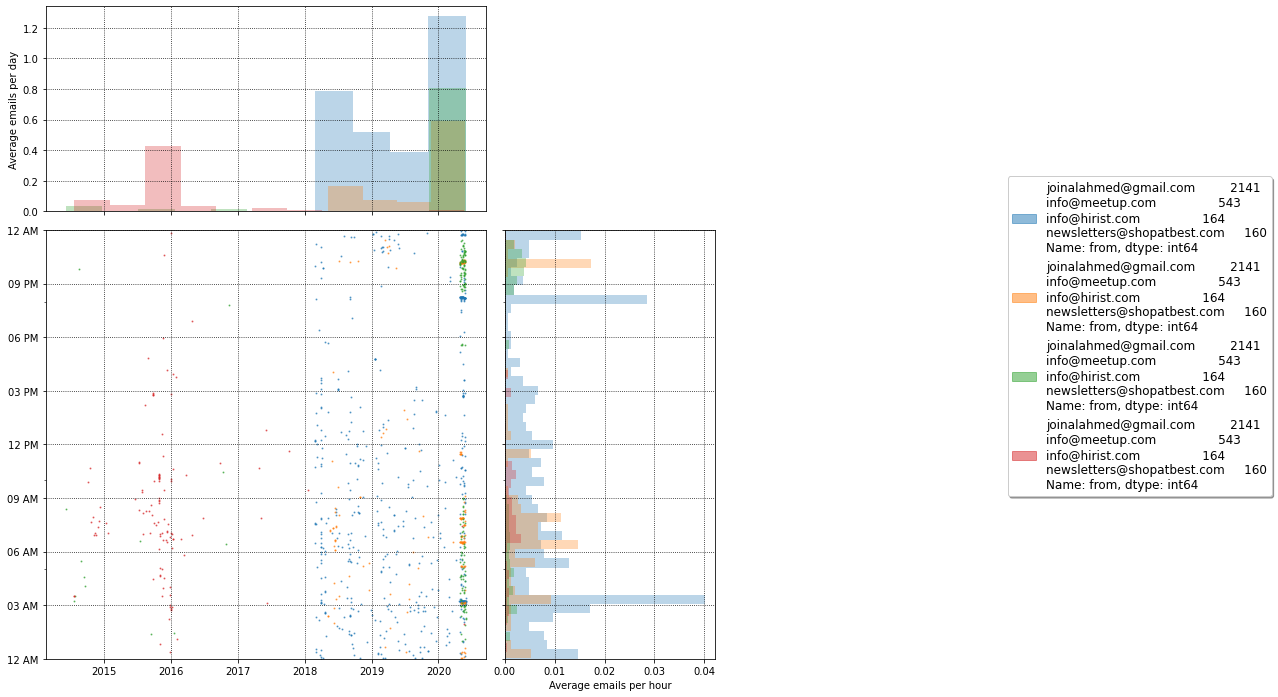

In [ ]:
# Plotting the above inferences in a Triple Plot
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[2.8, 0.2], fontsize=12, shadow=True);

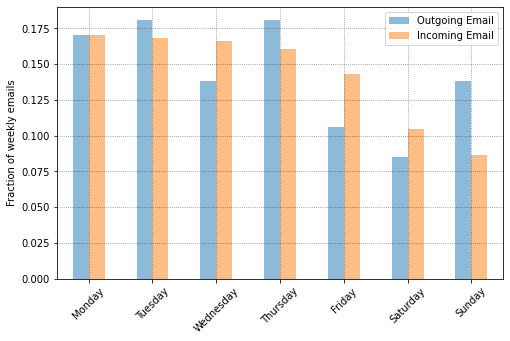

In [ ]:
# Plotting bar chart with multiple values

sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

We can even go one level further. Let's find the most active time of day for email communication. We can do that easily. See the following code:

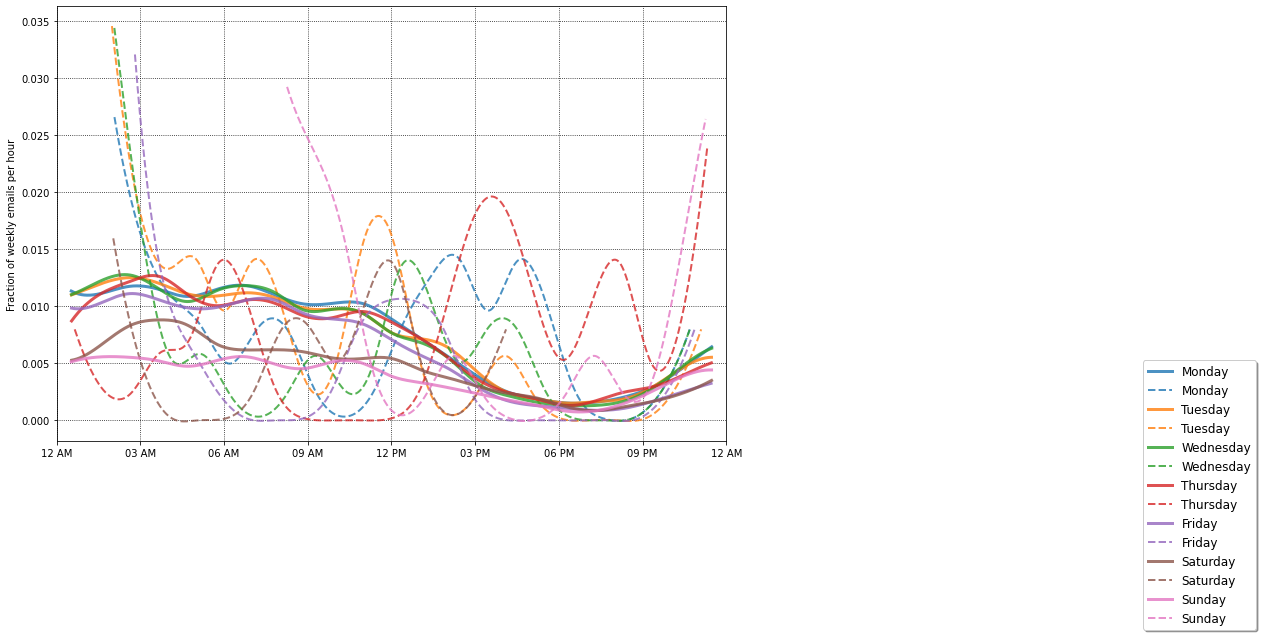

In [ ]:
import scipy.ndimage
from scipy.interpolate import interp1d
# Using the previously defined plot_number_perdhour_per_year function to find most active time of day

plt.figure(figsize=(12,8))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(bbox_to_anchor=[1.8, 0.2], fontsize=12, shadow=True)


One of the easiest things to analyze about your emails is the most frequently used words. We can create a word cloud to see the most frequently used words. Let's first remove the archived emails:

In [ ]:
!pip install WordCloud
# cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word.

     |████████████████████████████████| 163kB 613kB/s eta 0:00:01


In [ ]:
from wordcloud import WordCloud 

text = ' '.join(map(str, dfs['subject'].values))

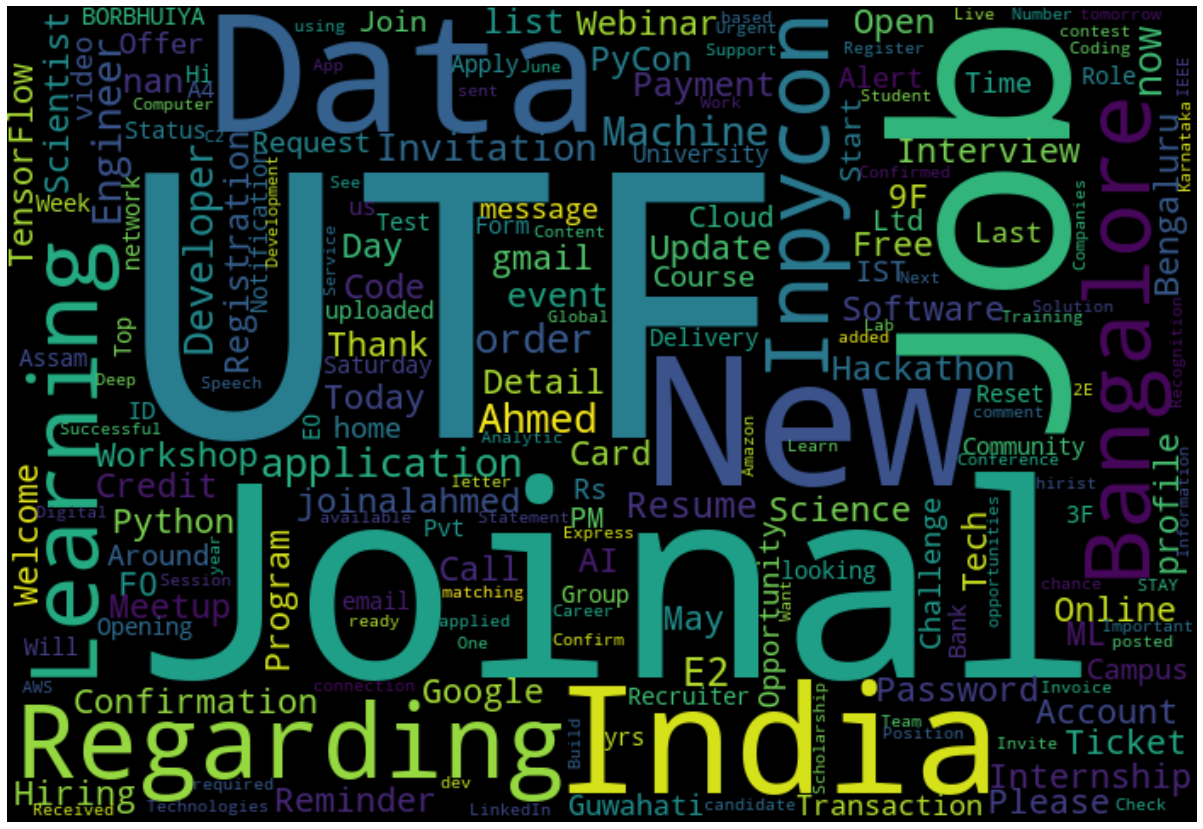

In [ ]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

This tells me what I mostly communicate about. From the analysis of emails from 2012 to 2020, the most frequently used words are Regarding, India, new, Data, job, and learning. This is really good, right? What is presented in this notebook is just a starting point. You can take this further in several other directions. 